In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Import ErichRLib

In [2]:
import EnrichRLib as erl

Gene list may be imported from file or direct entered in code as list object

In [3]:
gl = [  'CD3E', 'BLK', 'PTPN22', 'PAG1', 'CTLA4', 'PIK3CD', 'LAT2', 'CSK', 
        'CD247', 'CD3G', 'THEMIS', 'PSMB8', 'LCP2', 'GATA3', 'LAT', 'SLA2', 
        'SKAP1', 'TRAT1', 'BCL2', 'CD3D', 'THY1','RUNX1', 'BLK', 'PTPN22']


# Fetching gene sets from Enrichr website 

In [4]:
# sub directory where gene sets in .gmt format will be placed
lib_dir='_tmp'

# List of gene sets to fetch, by default all gene sets will be fetched
gss = [ 
       'GO_Biological_Process_2018',
       'GO_Cellular_Component_2018',
       'GO_Molecular_Function_2018',
       'KEGG_2016',
       'Reactome_2016'
       ]

erl.get_Enrichr(out_dir='_tmp', libs=gss)

Directory  _tmp  created 
GO_Biological_Process_2018  -- DONE
GO_Cellular_Component_2018  -- DONE
GO_Molecular_Function_2018  -- DONE
KEGG_2016  -- DONE
Reactome_2016  -- DONE


# Enrichment of single gene set

In [5]:
# gene set name and file name
lib_dir='_tmp'
gsn = 'Reactome_2016'
gs_fn =lib_dir+'/'+gsn+'.gmt'

# read gmt to python dictionary
gs = erl.read_gmt(gs_fn)

print(gs['Formation of Incision Complex in GG-NER_Homo sapiens_R-HSA-5696395'])

['UBE2I', 'PARP2', 'USP45', 'PARP1', 'CHD1L', 'RPA2', 'RPA3', 'GTF2H1', 'RAD23B', 'GTF2H2', 'RPA1', 'GTF2H3', 'RAD23A', 'PIAS1', 'GTF2H4', 'GTF2H5', 'PIAS3', 'RBX1', 'DDB2', 'CUL4B', 'ERCC1', 'CUL4A', 'DDB1', 'CDK7', 'ERCC4', 'ERCC5', 'ERCC2', 'ERCC3', 'UBE2V2', 'UBA52', 'MNAT1', 'UBE2N', 'CETN2', 'CCNH', 'XPA', 'XPC', 'UBC', 'SUMO2', 'SUMO1', 'UBB', 'SUMO3', 'RPS27A', 'RNF111']


### Enrichment run

In [6]:
enr = erl.enrich(gl, gs)

Text(0.5,1,'Reactome_2016')

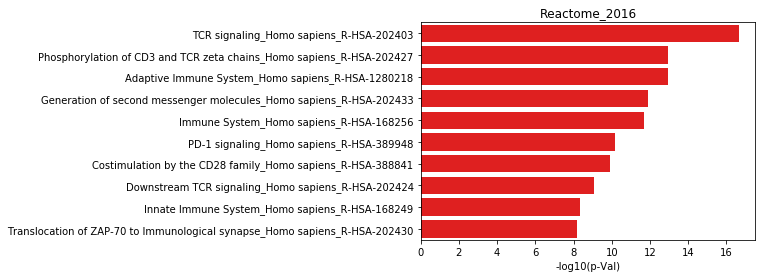

In [7]:
# Plot result as barplot and compare with EnrichR image

import seaborn as sns

ds = enr.head(10)
sns.barplot(y=ds.index,
                x='-log10(p-Val)', 
                color="Red",
                data = ds)
plt.title(gsn)

![title](im/React2016_EnrichTest_bar.png)

# Enrichment of several gene sets: batch analysis

In [8]:
# List of gene sets as above
gss = [ 
       'GO_Biological_Process_2018',
       'GO_Cellular_Component_2018',
       'GO_Molecular_Function_2018',
       'KEGG_2016',
       'Reactome_2016'
       ]

### Batch enrichment 

In [9]:
enrr = erl.enrich_gs(gl,gss, path_lib=lib_dir)

GO_Biological_Process_2018 492
GO_Cellular_Component_2018 21
GO_Molecular_Function_2018 59
KEGG_2016 90
Reactome_2016 219


### Plots 

Text(0.5,1,'All terms')

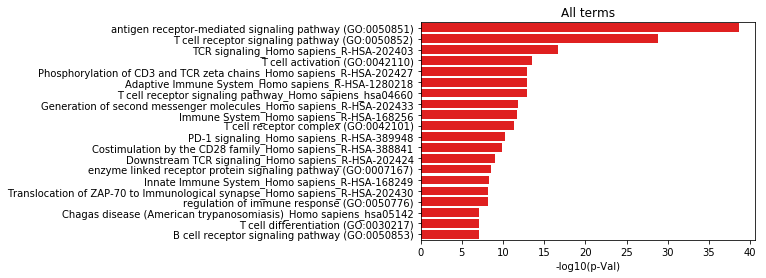

In [10]:
enrr.sort_values('p-Val', axis=0, inplace = True)
ds = enrr.head(20)

f, ax = plt.subplots()
sns.barplot(y=ds.index,
            x='-log10(p-Val)',
            ax = ax, 
            color="Red", 
            data = ds)
ax.set_title('All terms')

# Clustering 

In [11]:
# For futher analysis it is convinient to filter terms by p-value for
enrr = enrr[enrr['p-Val']<0.001]
len(enrr)

105

## Calculate closeness by kappa-score

In [12]:
dd = erl.kappa_matrx(gl,enrr)

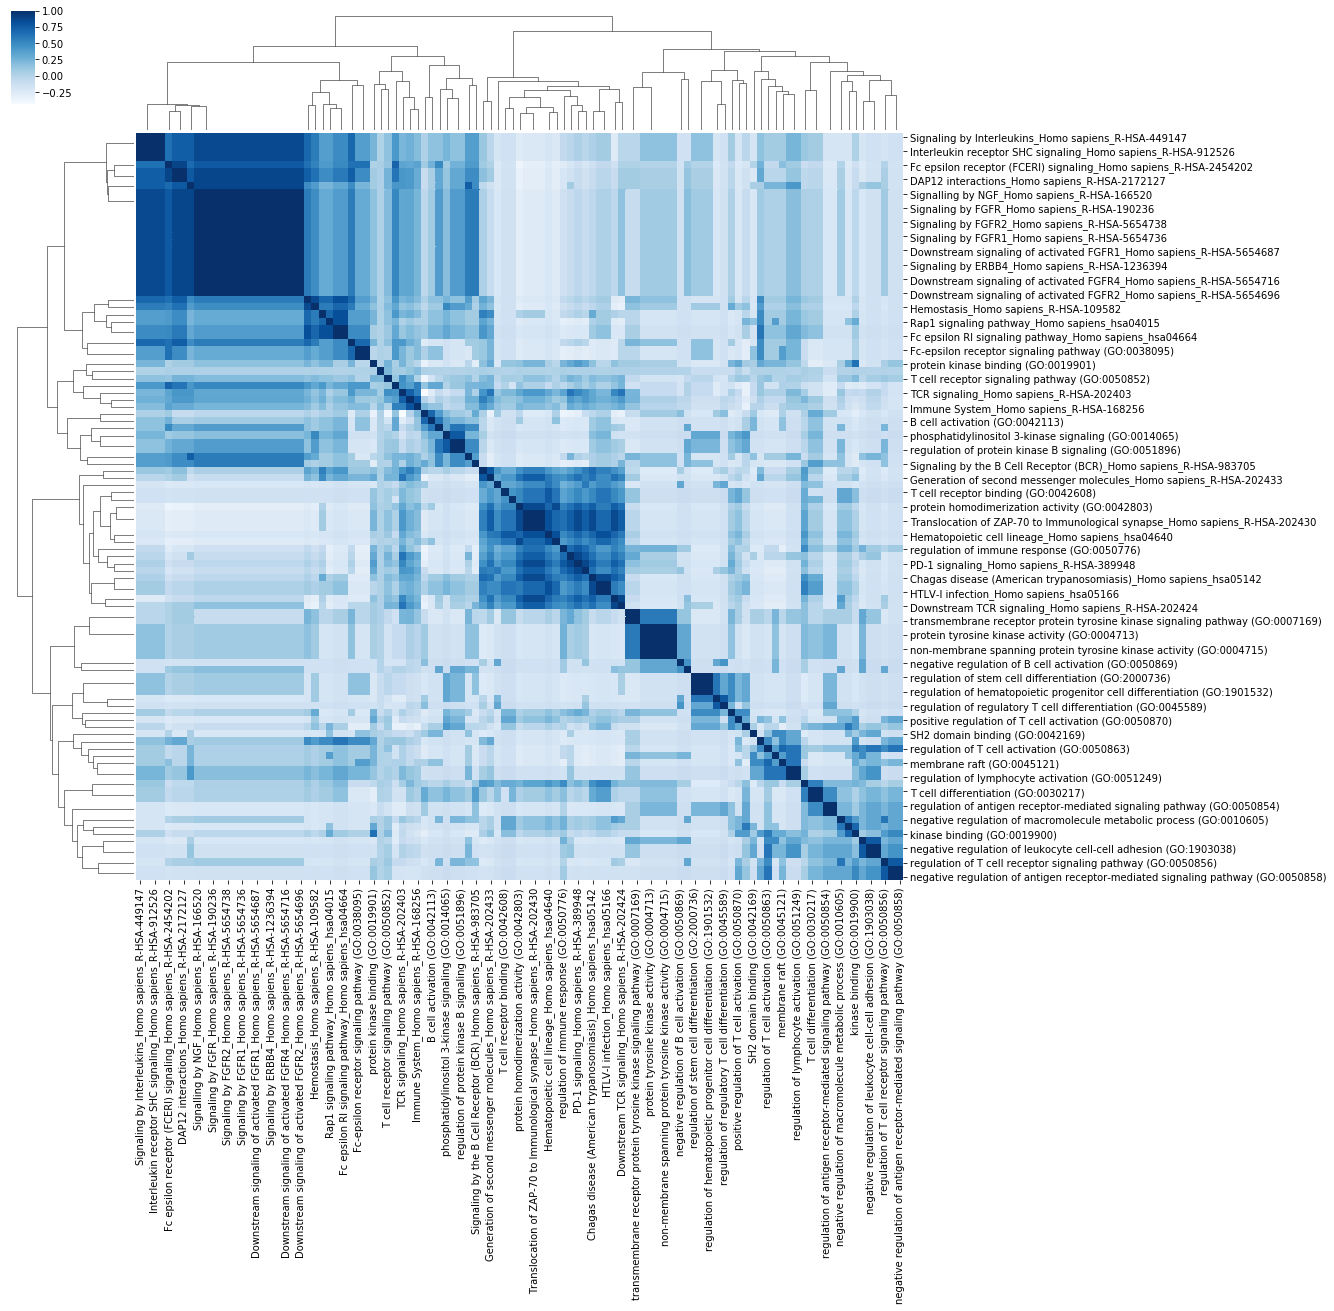

In [13]:
## Show cluster based on kappa-score closeness

grid = sns.clustermap(dd, cmap='Blues', figsize=(16, 16))

## Clastering:  top level

Text(0.5,1,'All terms')

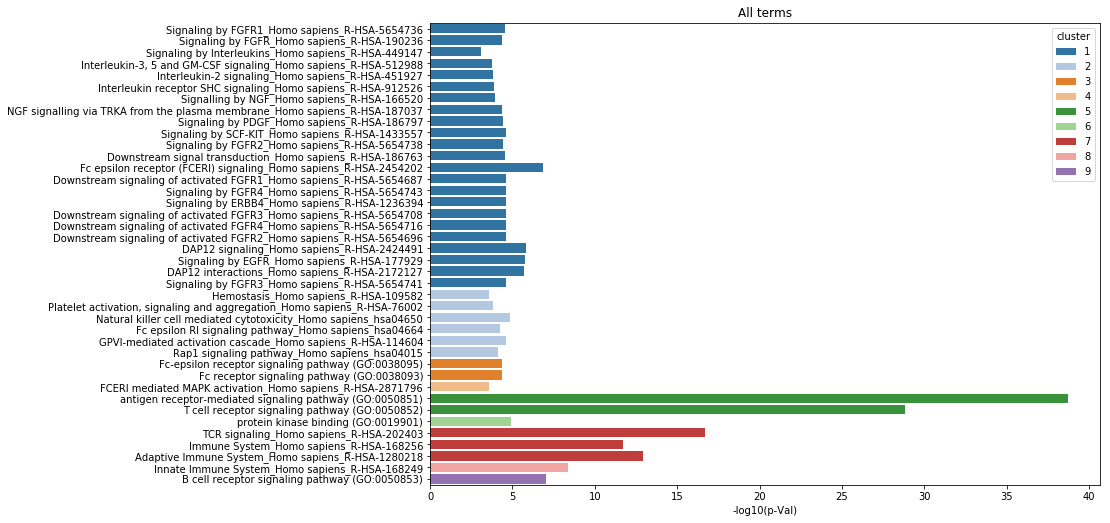

In [16]:
## Cluster: this calculate and add cluster number column
enrr = erl.cluster(gl,enrr)

# Make additional calculation on existing columns for visualization
enrr.loc[:,'ass_genes_percnt'] = 100*enrr.loc[:,'num_list']/enrr.loc[:,'num_term']
enrr.sort_values('cluster', axis=0, inplace = True)

# use consistent discrete palette
cm = 'tab20'

ds = enrr.head(40)

f, ax = plt.subplots(figsize=(12, 8.5))
sns.barplot(y=ds.index,
            x='-log10(p-Val)',
            ax = ax, 
            hue ='cluster',
            dodge=False,
            data = ds,
            palette = cm)
ax.set_title('All terms')

Text(0.5,0,'%Genes/Term')

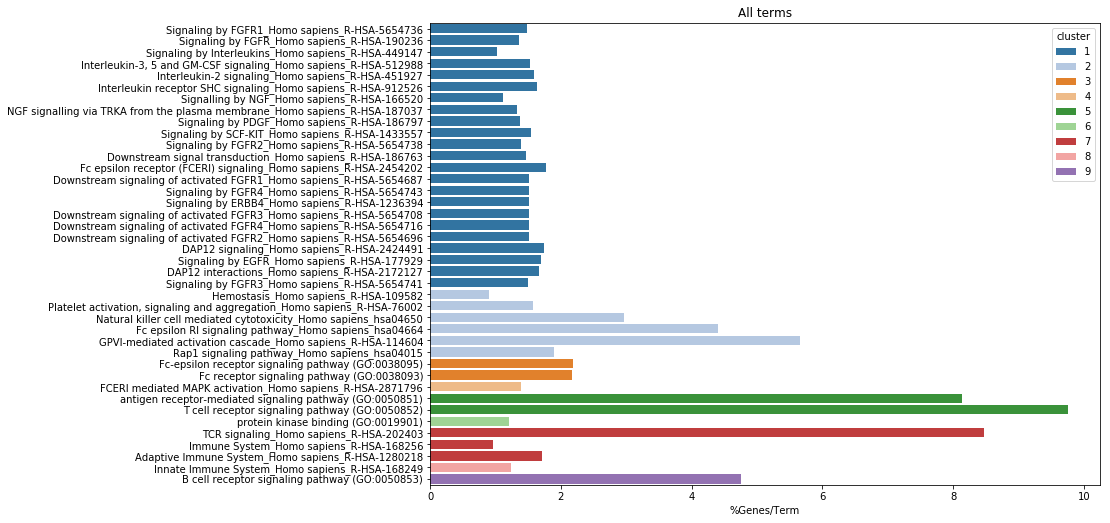

In [18]:
f, ax = plt.subplots(figsize=(12, 8.5))
sns.barplot(y=ds.index,
            x='ass_genes_percnt',
            ax = ax, 
            hue ='cluster', 
            dodge=False,
            data = ds,
            palette = cm)
ax.set_title('All terms')
ax.set_xlabel('%Genes/Term')

# Network construction based on cluster

In [19]:
## Graph and network
## control conectivity by kappa score parameter, default kappa=0.4
G,enrrr, nt = erl.make_graph(gl, enrr, kappa=0.4)

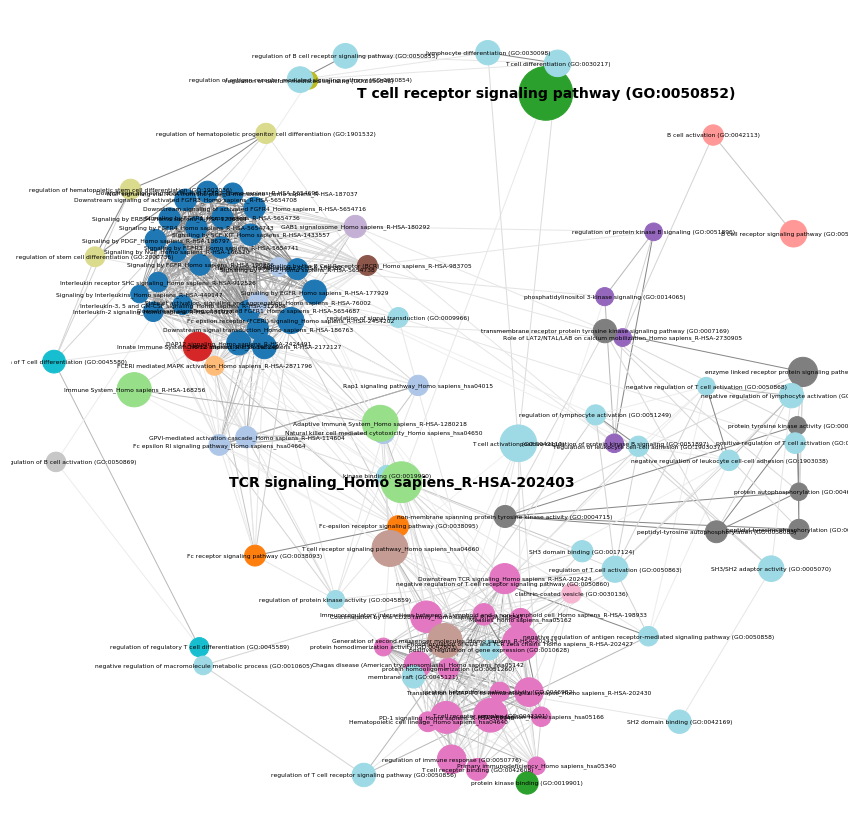

In [24]:
erl.draw_graph(G, spring=1.7, pval_prcnt=0.5, palette=cm)

Text(0.5,1,'All terms')

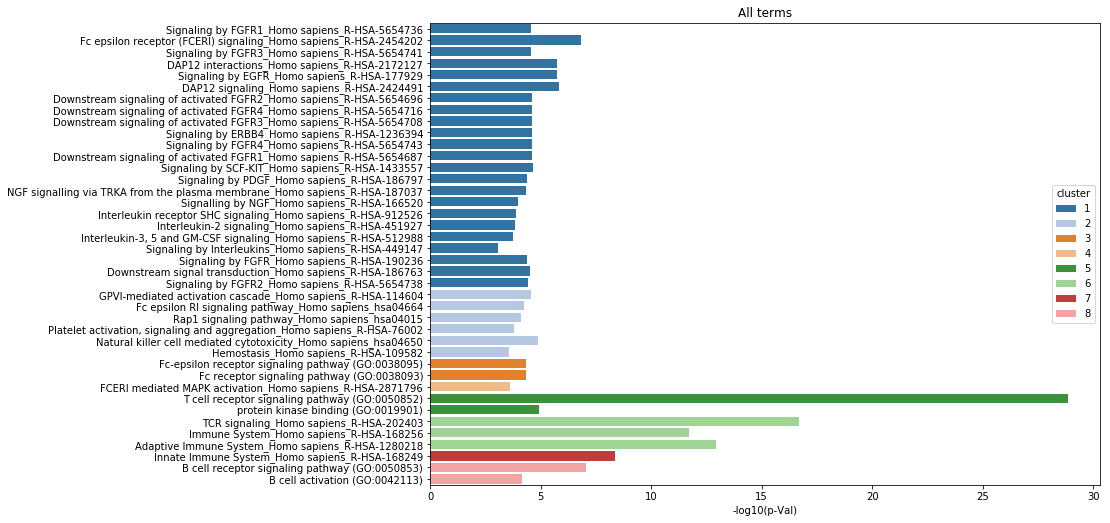

In [22]:
enrrr.sort_values('cluster', axis=0, inplace = True)

# use consistent discrete palette
cm = 'tab20'

dss = enrrr.head(40)

f, ax = plt.subplots(figsize=(12, 8.5))
sns.barplot(y=dss.index,
            x='-log10(p-Val)',
            ax = ax, 
            hue ='cluster',
            dodge=False,
            data = dss,
            palette = cm)
ax.set_title('All terms')

## Exporting network tables for Cytoscape

In [23]:
# If save result and network for Cytoscape
exp_name='GO_KEGG_React'

SAVE = False

if SAVE:
    enrr.to_csv(exp_name+'-enrich.txt', sep="\t")
    nt.to_csv(exp_name+'-network.txt', sep="\t")
    enrrr.to_csv(exp_name+'-network_table.txt', sep="\t")

![title](im/React2016_EnrichTest_net.png)

# ClueGO for same gene list and coresponding gene sets

![title](im/React2016_EnrichTest_netClue.png)